In [1]:
# Importing the Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image #Pillow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the dataset

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of arrays
print(X_train.shape,X_test.shape,X_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000, 28, 28) (10000,)


Training Data = 60,000
Test data = 10,000
Image Dimension = 28 X 28
GreyScale Images




In [5]:
# Printing the ith image
print(X_train[21])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64
  253 255  63   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 205
  251 253 205 111   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 189 251
  251 253 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16  64 223 244 251 251
  211 213 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  80 181 251 253 25

In [6]:
print(X_train[21].shape)

(28, 28)


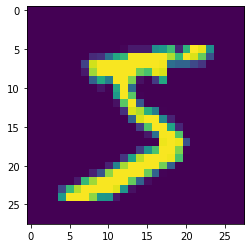

------
5


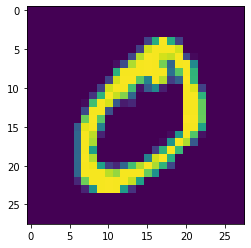

------
0


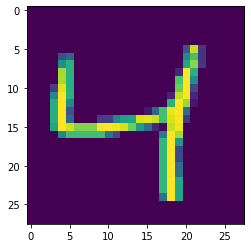

------
4


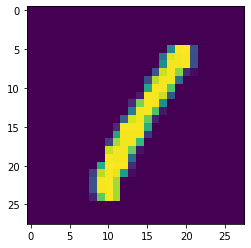

------
1


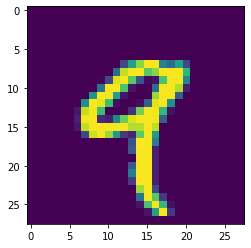

------
9


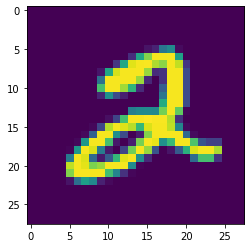

------
2


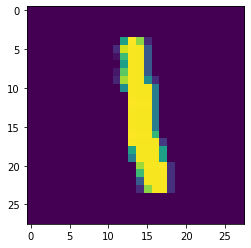

------
1


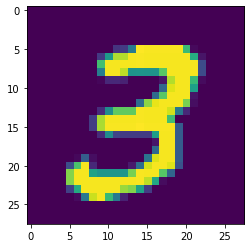

------
3


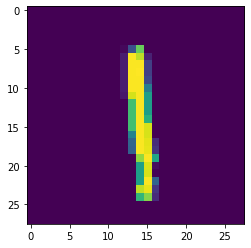

------
1


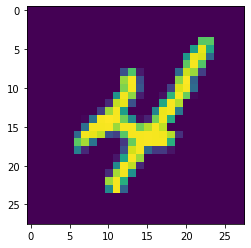

------
4


In [7]:
# Displaying the image 
for i in range (10):
  plt.imshow(X_train[i])
  plt.show()
  print('------')
  # Print the label
  print(Y_train[i])

In [8]:
# Unique data
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Scaling or Normalization
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
# Building a Neural Network by setting up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [13]:
# Compiling the model
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Training the Neural Network
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [15]:
# Accuracy on test Data,Evaluation
loss,accuracy=model.evaluate(X_test,Y_test)
# Make prediction with X_test and then compare with Y_test
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1515 - accuracy: 0.9707
0.9707000255584717


In [16]:
print(X_test.shape)

(10000, 28, 28)


In [17]:
Y_pred = model.predict(X_test)
Y_pred.shape
# This shows shape (10000,10) 10 because it gives individual prediction of 0-9

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [19]:
print(Y_pred[9999])

[8.3160794e-06 7.1944578e-07 7.6943339e-05 6.3419197e-06 3.0600376e-07
 8.0435777e-01 1.0000000e+00 1.2435119e-11 5.8433166e-08 1.9179337e-16]


In [20]:
max_label_test = []
for i in range (10000):
  R=np.argmax(Y_pred[i])
  max_label_test.append(R)


In [21]:
print(max_label_test[5])
print(Y_test[5])

1
1


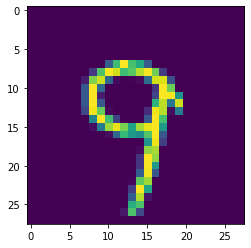

Actual--> 9
Predicted--> 9


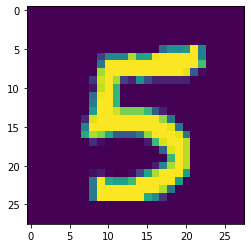

Actual--> 5
Predicted--> 5


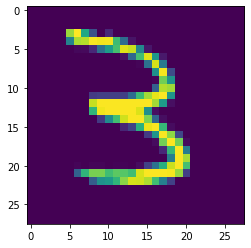

Actual--> 3
Predicted--> 3


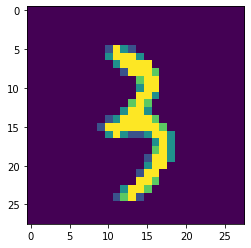

Actual--> 3
Predicted--> 3


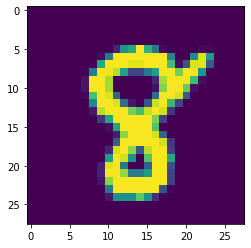

Actual--> 8
Predicted--> 8


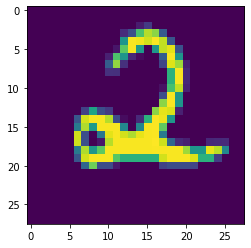

Actual--> 2
Predicted--> 2


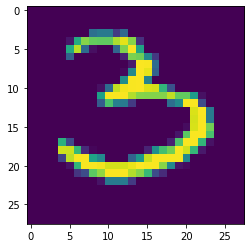

Actual--> 3
Predicted--> 3


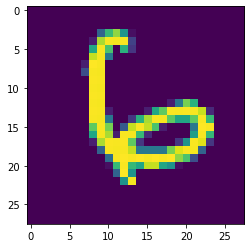

Actual--> 6
Predicted--> 6


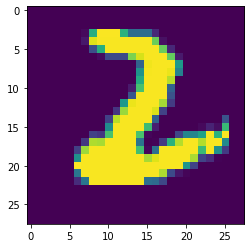

Actual--> 2
Predicted--> 2


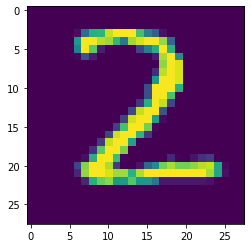

Actual--> 2
Predicted--> 2


In [22]:
for i in range (2345,2355):
  plt.imshow(X_test[i])
  plt.show()
  print('Actual-->',Y_test[i])
  print('Predicted-->',max_label_test[i])

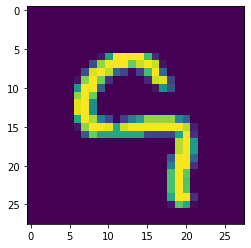

Actual--> 9
Predicted--> 5


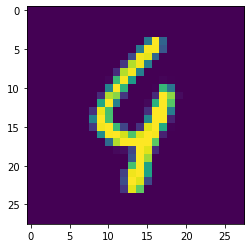

Actual--> 4
Predicted--> 9


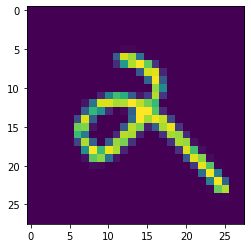

Actual--> 2
Predicted--> 9


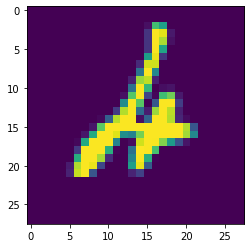

Actual--> 4
Predicted--> 6


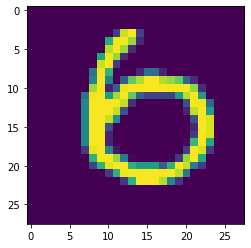

Actual--> 6
Predicted--> 0


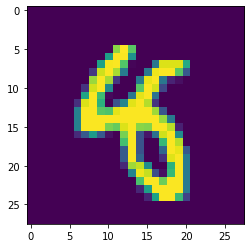

Actual--> 8
Predicted--> 9


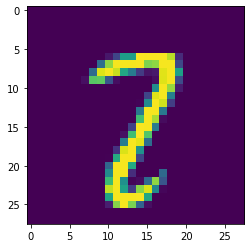

Actual--> 2
Predicted--> 7


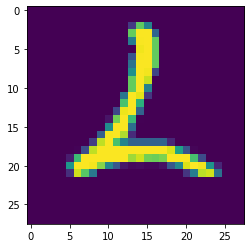

Actual--> 2
Predicted--> 6


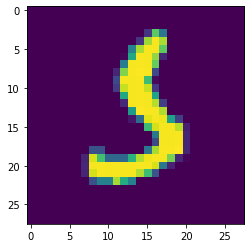

Actual--> 5
Predicted--> 3


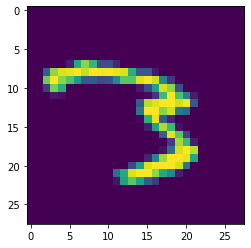

Actual--> 3
Predicted--> 7


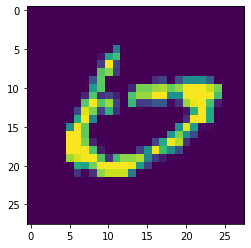

Actual--> 6
Predicted--> 0


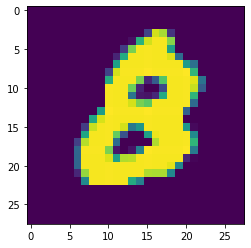

Actual--> 8
Predicted--> 0


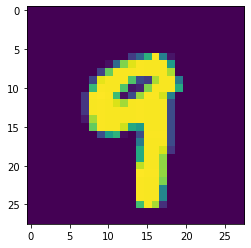

Actual--> 9
Predicted--> 4


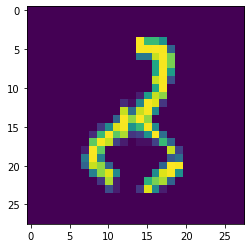

Actual--> 8
Predicted--> 2


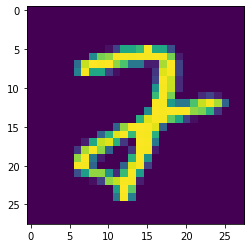

Actual--> 2
Predicted--> 7


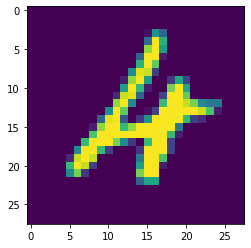

Actual--> 4
Predicted--> 6


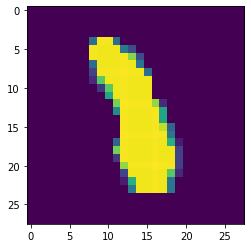

Actual--> 1
Predicted--> 8


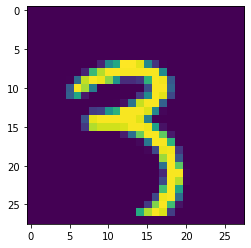

Actual--> 3
Predicted--> 9


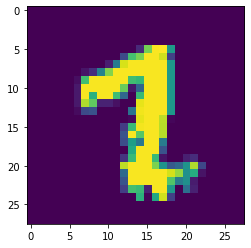

Actual--> 2
Predicted--> 9


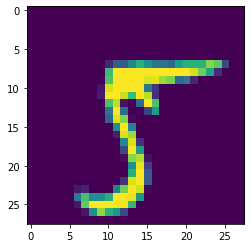

Actual--> 5
Predicted--> 3


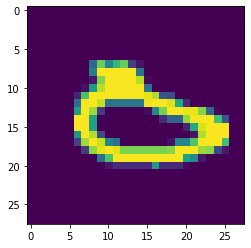

Actual--> 0
Predicted--> 7


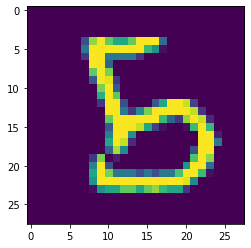

Actual--> 5
Predicted--> 8


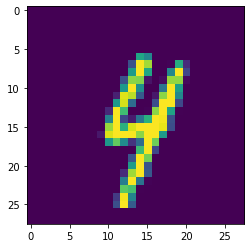

Actual--> 4
Predicted--> 9


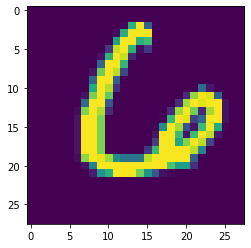

Actual--> 6
Predicted--> 0


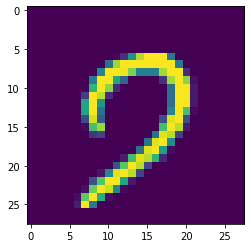

Actual--> 7
Predicted--> 9


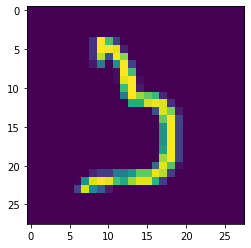

Actual--> 3
Predicted--> 5


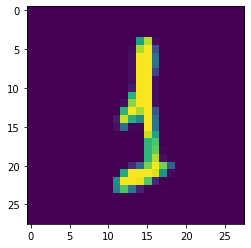

Actual--> 1
Predicted--> 3


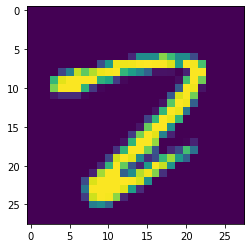

Actual--> 2
Predicted--> 7


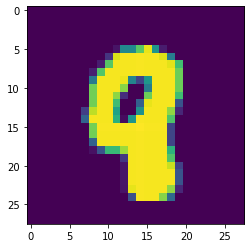

Actual--> 8
Predicted--> 9


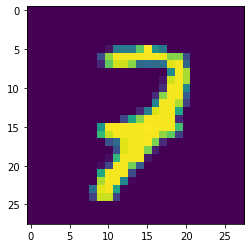

Actual--> 7
Predicted--> 9


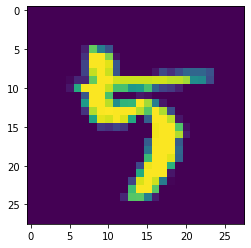

Actual--> 5
Predicted--> 4


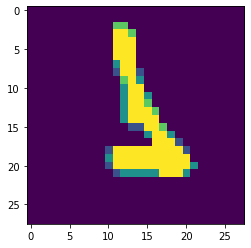

Actual--> 1
Predicted--> 3


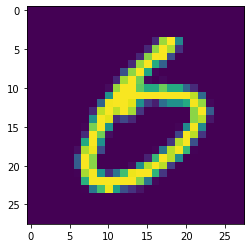

Actual--> 6
Predicted--> 0


In [23]:
for i in range (1000):
  if Y_test[i]!= max_label_test[i]:
    plt.imshow(X_test[i])
    plt.show()
    print('Actual-->',Y_test[i])
    print('Predicted-->',max_label_test[i])

In [24]:
# Another way
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

In [25]:
# Building the Confusion Matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 965    0    0    0    1    1    5    2    2    4]
 [   0 1122    1    4    0    2    2    1    3    0]
 [   4    0  981    4    5    3   10   13    9    3]
 [   0    0    3  978    0   12    1    4    0   12]
 [   1    0    0    0  950    0   13    2    4   12]
 [   3    0    0   17    2  858    5    1    3    3]
 [   6    1    0    1    1    4  944    0    1    0]
 [   2    2    7    5    4    0    1  997    1    9]
 [   9    2    2    8    3    5    6    3  931    5]
 [   0    3    0    7   14    6    2    7    0  970]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

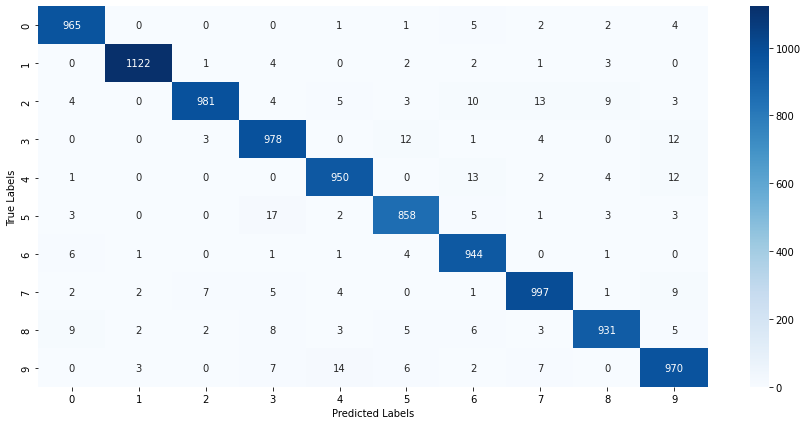

In [26]:
# Building the Heatmaps
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [27]:
input_img = '/content/digit3.png'
input_img = cv2.imread(input_img)

In [28]:
type(input_img)

numpy.ndarray

In [29]:
print(input_img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [51 51 51]
  ...
  [51 51 51]
  [51 51 51]
  [19 19 19]]]


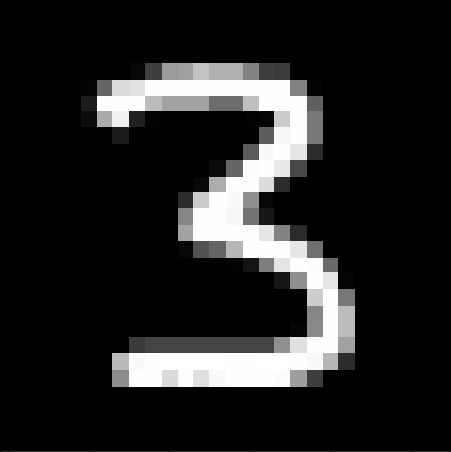

In [30]:
cv2_imshow(input_img)

In [31]:
input_img.shape

(452, 451, 3)

In [32]:
grayscale = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [33]:
grayscale.shape

(452, 451)

In [34]:
input_img_resize = cv2.resize(grayscale,(28,28))

In [35]:
input_img_resize.shape

(28, 28)

In [36]:
cv2_imshow(input_img_resize)

In [37]:
input_img_resize = input_img_resize/255

In [38]:
image_reshape = np.reshape(input_img_resize,[1,28,28])

In [39]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 16ms/step
[[2.0370820e-13 5.9626923e-06 4.3831269e-06 1.0000000e+00 5.4183499e-07
  1.7519921e-02 2.2246310e-15 7.3894189e-12 9.9711847e-01 2.3134405e-04]]


In [40]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
